In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [116]:
def data_generation(n):
    radius = np.random.uniform(low=0, high=2,size=n).reshape(-1,1)
    angle  = np.random.uniform(low=0, high=2*np.pi, size =n).reshape(-1,1)
    x1     = radius*np.cos(angle)
    x2     = radius*np.sin(angle)
    y      = (radius<1).astype(int).reshape(-1)
    x      = np.concatenate([x1,x2], axis=1)
    return x,y

In [117]:
n_train = 10000
n_valid = 500
n_test  = 2000
train_x, train_y  = data_generation(n_train)
valid_x, valid_y = data_generation(n_valid)
test_x, test_y  = data_generation(n_test)

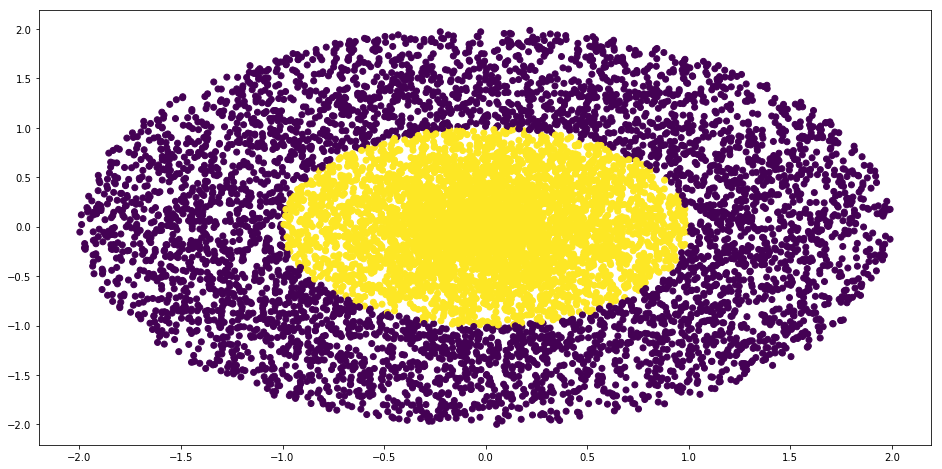

In [118]:
plt.scatter(train_x[:,0], train_x[:,1], c= train_y);

## Single hidden layer Vs. Multi layer 



In [119]:
def generate_single_layer_MLP(n_hidden_neurons):
    return nn.Sequential(nn.Linear(2,n_hidden_neurons), 
                        nn.RReLU(),
                        nn.Linear(n_hidden_neurons, 2))

In [120]:
model1 = generate_single_layer_MLP(4)

In [121]:
train_x = (torch.from_numpy(train_x).float())
train_y = torch.from_numpy(train_y).float().type(torch.LongTensor)
valid_x = torch.from_numpy(valid_x).float()
valid_y = torch.from_numpy(valid_y).float().type(torch.LongTensor)
test_x  = torch.from_numpy(test_x).float()
test_y  = torch.from_numpy(test_y).float().type(torch.LongTensor)

In [122]:
print (train_x.type())

torch.FloatTensor


In [123]:
def training_routine(net, datset, n_iters, gpu):
    train_data, train_labels, val_data, val_labels = dataset
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    training_loss  =[]
    training_accuracy = []
    validation_loss   =[]
    validation_accuracy = []
    if gpu:
        train_data, train_labels =  train_data.cuda(), train_labels.cuda()
        val_data, val_labels = val_data.cuda(), val_labels.cuda()
        net = net.cuda()
        print ("Training using GPU")
    else:
        print ("Training using CPU")
    for i in range(n_iters):
        train_output = net(train_data)
        train_loss   = criterion(train_output, train_labels)
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if i%100 ==0:
#             print ("At interation", i)
            train_prediction = train_output.cpu().detach().argmax(dim=1)
            train_accuracy   = (train_prediction.numpy() == train_labels.numpy()).mean()
            val_output       = net(val_data)
            val_loss         = criterion(val_output,val_labels)
            val_prediction   = val_output.cpu().detach().argmax(dim=1)
            val_accuracy     = (val_prediction.numpy() == val_labels.numpy()).mean()
            training_loss.append(train_loss)
            validation_loss.append(val_loss)
            training_accuracy.append(train_accuracy)
            validation_accuracy.append(val_accuracy)
    plt.rcParams['figure.figsize'] = (16,8)
    ax1=plt.subplot(121, frameon=False)
    ax1.plot(training_loss, label= 'training')
    ax1.plot(validation_loss, label= 'validation')
    ax1.legend()
    ax1.set_xlabel('epoches')
    ax1.set_ylabel('Loss')
    ax2 =plt.subplot(122, frameon=False)
    ax2.plot(training_accuracy)
    ax2.plot(validation_accuracy)
    ax2.set_ylabel('Accuracy')

    


In [124]:
dataset = train_x.type(torch.float), train_y, valid_x.type(torch.float), valid_y

Training using CPU


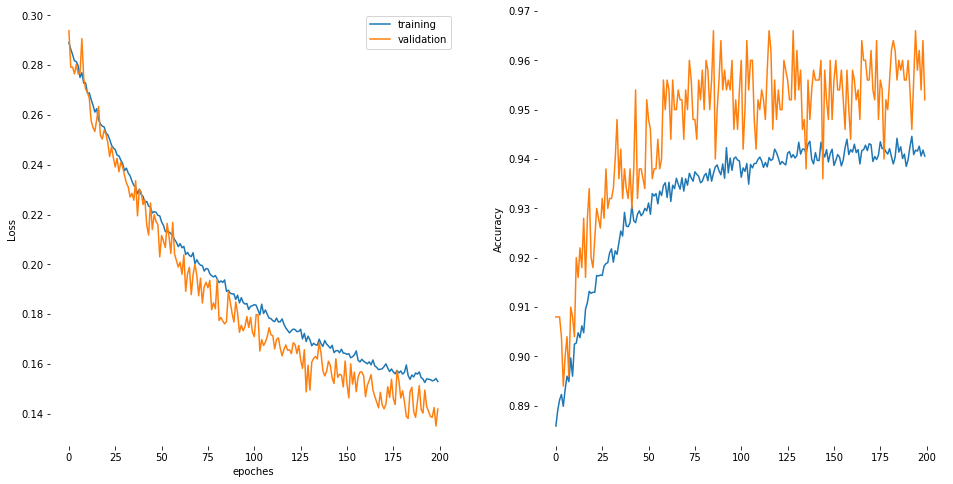

In [131]:
gpu = False
training_routine(model1, dataset, 20000, gpu)

In [126]:
for i in model1.parameters():
    print (i)

Parameter containing:
tensor([[ 0.2629,  1.5825],
        [ 0.0386,  0.1947],
        [-1.7108,  1.6601],
        [ 2.1186,  1.0285]], requires_grad=True)
Parameter containing:
tensor([ 2.0121, -0.3078,  0.2605,  0.2031], requires_grad=True)
Parameter containing:
tensor([[-1.6418, -0.0299,  1.3643,  1.5526],
        [ 1.7721,  0.5662, -1.7446, -1.6296]], requires_grad=True)
Parameter containing:
tensor([ 0.9906, -1.3135], requires_grad=True)


In [127]:
def print_model(model, datapoints):
    out = model(datapoints).argmax(dim=1).detach().numpy()
    green = datapoints.numpy()[np.where(out==1)]
    red   = datapoints.numpy()[np.where(out==0)]
    circle1 = plt.Circle((0,0),1, color='y')
    circle2 = plt.Circle((0,0),1, color='r', fill = False)
    fig, ax = plt.subplots()
    
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    pos_values =plt.scatter(x =green[:,0], y =green[:,1], color='g',);
    neg_values = plt.scatter(x =red[:,0], y=red[:,1], color='r',);
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(pos_values)
    ax.add_artist(neg_values)

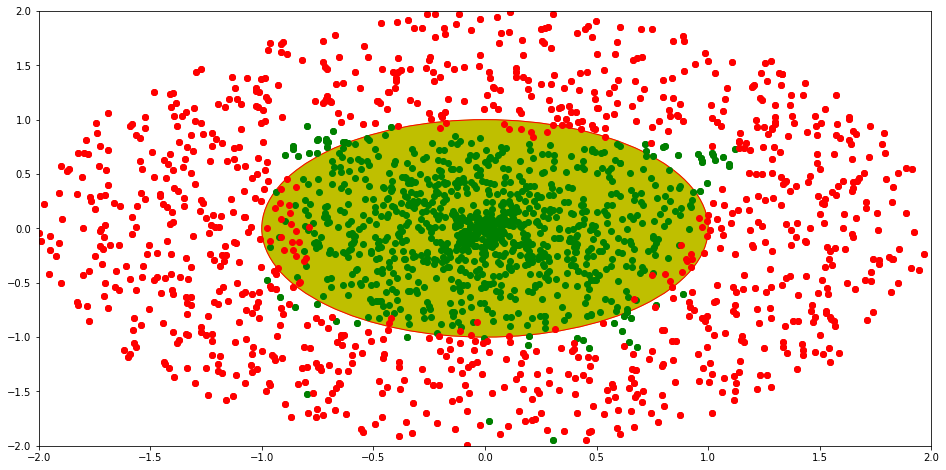

In [132]:
print_model(model1, test_x.type(torch.float))

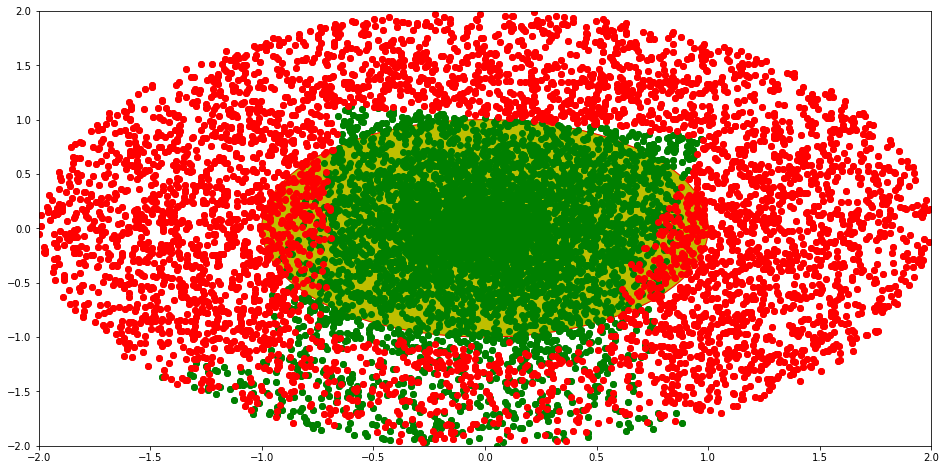

In [130]:
print_model(model1, train_x)

## With 2 neurons in hidden layer

Training using CPU


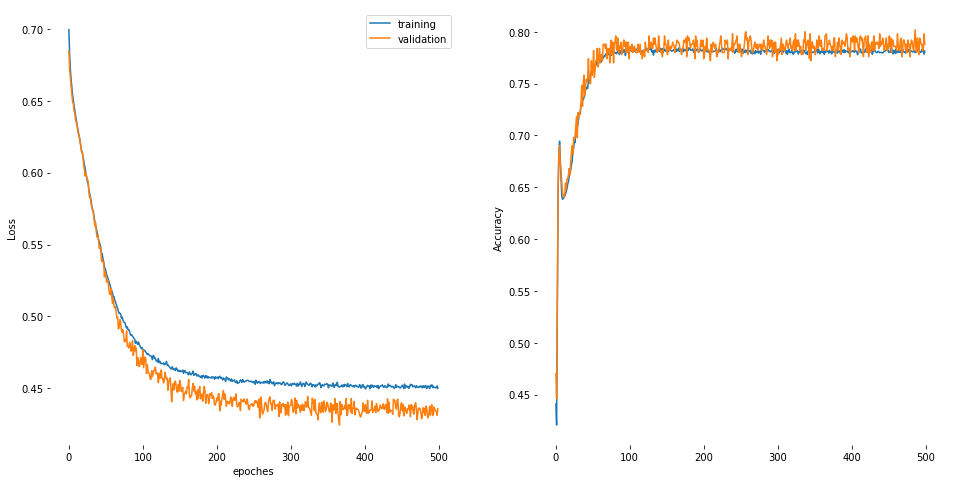

In [137]:
model2 = generate_single_layer_MLP(2)
training_routine(model2, dataset, 50000, gpu)

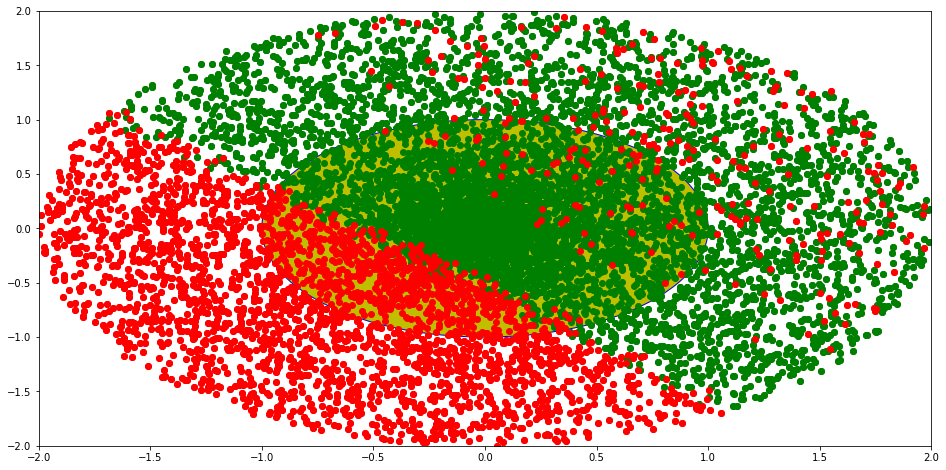

In [136]:
print_model2(model2, train_x)